<a href="https://colab.research.google.com/github/Quercusoak/Shallow-and-Deep-Neural-Networks-Exercise/blob/main/Shallow_and_Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2: Shallow and Deep Neural Networks

# Q1: The MNIST dataset

Below is a code to train a neural network on the MNIST dataset. The accuracy achieved is ~77%. Try to change the training process in order to improve the network's performance, the best you can.

You can change:

- The loss function.
- The batch size.
- The learning rate.

Try to tune these parameters in order to achive the best accuracy.

**Don't change the network or the number of epochs**.

**Note:** If you change the loss function, you might need to change relavant parts of the code accordingly.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

# Load MNIST dataset from torch datasets
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 55.0MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 2.17MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 15.1MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.86MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Define a network class
class SoftmaxNet(nn.Module):
    def __init__(self):
        super(SoftmaxNet, self).__init__()
        torch.manual_seed(0)
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = nn.Softmax(dim=1)(self.fc3(x))
        return x

In [ ]:
# One-hot encoding
def one_hot_encode(labels):
    one_hot = torch.zeros(labels.shape[0], 10)
    one_hot[torch.arange(labels.shape[0]), labels] = 1
    return one_hot

In [ ]:
def accuracy(net, test_loader):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            outputs = net(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    return 100 * correct / total

In [ ]:
softmax_net = SoftmaxNet()
criterion = nn.MSELoss()#nn.CrossEntropyLoss() - acc: 95.88, loss: 1.5~

def train(epochs):
    optimizer = optim.SGD(softmax_net.parameters(), lr=0.4)
    LOSS = []
    for epoch in range(epochs):
        for data, target in train_loader:
            optimizer.zero_grad()
            output = softmax_net(data)
            loss = criterion(output, one_hot_encode(target))
            loss.backward()
            optimizer.step()
            LOSS.append(loss.item())
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')
    return LOSS

train(15)
accuracy(softmax_net, test_loader)

Epoch 1, Loss: 0.0128
Epoch 2, Loss: 0.0113
Epoch 3, Loss: 0.0136
Epoch 4, Loss: 0.0211
Epoch 5, Loss: 0.0003
Epoch 6, Loss: 0.0004
Epoch 7, Loss: 0.0073
Epoch 8, Loss: 0.0010
Epoch 9, Loss: 0.0084
Epoch 10, Loss: 0.0065
Epoch 11, Loss: 0.0071
Epoch 12, Loss: 0.0073
Epoch 13, Loss: 0.0065
Epoch 14, Loss: 0.0062
Epoch 15, Loss: 0.0039


96.63

In [ ]:
criterion = nn.CrossEntropyLoss()
train(15)
accuracy(softmax_net, test_loader)

Epoch 1, Loss: 1.5151
Epoch 2, Loss: 1.4638
Epoch 3, Loss: 1.4874
Epoch 4, Loss: 1.4898
Epoch 5, Loss: 1.4653
Epoch 6, Loss: 1.5236
Epoch 7, Loss: 1.4619
Epoch 8, Loss: 1.4927
Epoch 9, Loss: 1.5311
Epoch 10, Loss: 1.4920
Epoch 11, Loss: 1.4924
Epoch 12, Loss: 1.5237
Epoch 13, Loss: 1.4612
Epoch 14, Loss: 1.4612
Epoch 15, Loss: 1.4915


96.69

## Explanation of methods:

Keeping the batch size 64 and loss function MSE, changing the learning rate to 0.4 - result: 96.63%.

Cross Entropy is a loss function more fitting to this problem.

For learning rate 0.4 and batch size 64, using Cross Entropy as a loss function got accuracy of 96.69%.

Just changing to BCE returned the accuracy 96.4, and the loss itself became a smaller value - 0.01 from 1.5.

# Q2: XOR functions

Train a neural network for the XOR dataset (see below). Experiment with different input sizes ($n=4,8,...$). We aim to work
with inputs having $n=16$ bits, or more. Our goals in this exercise are:

1. Train a neural network to achieve best accuracy on the XOR dataset. For this purpose choose the best networks by tuning, at least a subset, of the follwing parameters:

  - The input representation (e.g., 0/1 or 1/-1).
  - Number of layers.
  - Number of neurons in each layer.
  - Choice of activation function(s).
  - Batch size, for the mini-batch algorithm.
  - Number of epochs.
  - Learning rate.

Note: When you change one parameter you might need to re-tune a parameter you already tuned. For example, if you change the batch size, you might want to consider a different choice for the learning rate. Or, if you take a bigger network, you might want to use less epochs, etc.

2. Study, and demonstrate:
  
  - The effect of the number of layers on the number of neurons needed, and the accuracy attained.
  - The effect of the batch size in the minibatch gradient descent algorithm.
  - The effect of the batch size on the learning rate and other network parameters.
  - How the problem changes when the number of input bits grow.

3. On your final network, try to interpret the representation in the different hidden layers.

If needed you can apply any of the regularization methods we have learned.

Note: If you work with very large $n$, you will not be able to generate all possible 0/1 vectors, and you need to construct the dataset differently. Also, in this case it might be necessary to work with regularization.

## The dataset

In [ ]:
import torch
import numpy as np
import pandas as pd

In [ ]:
import itertools as it
class XORDataset(torch.utils.data.Dataset):

    @staticmethod
    def random_seubset(m, p=0.7):
        np.random.seed(0)
        return (np.random.uniform(0, 1, m) <= p).astype(int)

    # Generate all 0/1 vectors of length n
    @staticmethod
    def generate(n):
        return list(it.product(*[range(x + 1) for x in [1] * n]))

    def __init__(self, n=16, Train=True, is_minus1_instead_0=False):

        all = self.generate(n)
        a = self.random_seubset(2**n)
        if Train:
            self.X = torch.tensor(np.array(all)[a == 1])
        else:
            self.X = torch.tensor(np.array(all)[a == 0])

        if not is_minus1_instead_0:
          self.Y = self.X.sum(dim=1) % 2
        else:
          self.Y = (self.X.sum(dim=1) % 2)*2 - 1  # To represent input data as -1/1 vector

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

## Example of a small XOR dataset

In [ ]:
data = XORDataset(3)

In [ ]:
data.X

tensor([[0, 0, 0],
        [0, 1, 0],
        [0, 1, 1],
        [1, 0, 0],
        [1, 0, 1],
        [1, 1, 0]])

In [ ]:
data.Y

tensor([0, 1, 0, 1, 0, 0])

In [ ]:
data_val = XORDataset(3, Train=False)

In [ ]:
data_val.X

tensor([[0, 0, 1],
        [1, 1, 1]])

In [ ]:
data_val.Y

tensor([1, 1])

In [ ]:
data = XORDataset(3)

In [ ]:
data.X

tensor([[0, 0, 0],
        [0, 1, 0],
        [0, 1, 1],
        [1, 0, 0],
        [1, 0, 1],
        [1, 1, 0]])

In [ ]:
data.Y

tensor([0, 1, 0, 1, 0, 0])

In [ ]:
data_val = XORDataset(3, Train=False)

In [ ]:
data_val.X

tensor([[0, 0, 1],
        [1, 1, 1]])

In [ ]:
data_val.Y

tensor([1, 1])

## Defining XOR nn


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np

# define network class
class XORNet(nn.Module):

    def __init__(self, input_N, hidden ,activation_fn):
        super(XORNet, self).__init__()
        self.activation = activation_fn()
        self.hidden = nn.ModuleList()
        self.hidden.append(nn.Linear(input_N, hidden[0]))
        for input_size, output_size in zip(hidden, hidden[1:]):
            self.hidden.append(nn.Linear(input_size, output_size))
        self.output = nn.Linear(hidden[-1], 1)

    def forward(self, x):
      x = x.float()
      for layer in self.hidden:
        x = self.activation(layer(x))
      z = torch.sigmoid(self.output(x))
      return z.squeeze()

In [ ]:
def XOR_accuracy(net, test_loader):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            outputs = net(data)
            predicted = (outputs.data >= 0.5).int()
            total += target.size(0)
            correct += (predicted == target).sum().item()
    return 100 * correct / total

In [ ]:
import matplotlib.pyplot as plt

def plot_loss(train_loss, test_loss):
    plt.plot(train_loss, label='Train Loss')
    plt.plot(test_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
def train_model(model, train_loader, test_loader, epochs, learning_rate, loss_fn):
  optimizer = optim.SGD(model.parameters(), lr=learning_rate)
  Train_loss = []
  Val_loss =[]

  for epoch in range(epochs):
      model.train()
      for data, target in train_loader:
          optimizer.zero_grad()
          output = model(data)
          loss = loss_fn(output, target.float())
          loss.backward()
          optimizer.step()
          Train_loss.append(loss.item())

      # Validation
      model.eval()
      for test_data, test_target in test_loader:
          correct = model(test_data)
          test_loss = loss_fn(correct, test_target.float())
          Val_loss.append(test_loss.item())

      # print(f'Epoch {epoch+1}, Train Loss: {loss.item():.4f}, Val Loss: {test_loss.item():.4f}')

  print(f'Final Train Accuracy: {XOR_accuracy(model, train_loader):.2f}%')
  print(f'Final Validation Accuracy: {XOR_accuracy(model, test_loader):.2f}%')

  return Train_loss, Val_loss

In [ ]:
def build_training(n, batch_size, layers, activation_fn, learning_rate, epochs, loss_fn, is_neg1_or_0 = False):
  train_data = XORDataset(n, Train=True, is_minus1_instead_0=is_neg1_or_0)
  test_data = XORDataset(n, Train=False, is_minus1_instead_0=is_neg1_or_0)
  XOR_train_loader = DataLoader(train_data, batch_size, shuffle=True)
  XOR_test_loader = DataLoader(test_data, batch_size, shuffle=False)

  XOR_net = XORNet(n, layers, activation_fn)
  train_loss, test_loss = train_model(XOR_net, XOR_train_loader, XOR_test_loader, epochs, learning_rate, loss_fn)
  plot_loss(train_loss, test_loss)

## Training XOR nn and experiments

Final Train Accuracy: 94.17%
Final Validation Accuracy: 94.25%


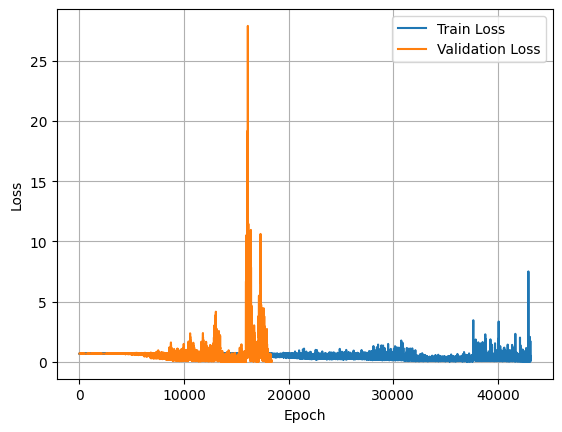

In [ ]:
n = 16
batch_size = 32
train_data = XORDataset(n, Train=True)
test_data = XORDataset(n, Train=False)
XOR_train_loader = DataLoader(train_data, batch_size, shuffle=True)
XOR_test_loader = DataLoader(test_data, batch_size, shuffle=False)
layers = [16,16]
activation_fn = nn.ReLU
XOR_net = XORNet(n, layers, activation_fn)
learning_rate=0.08
epochs=30
train_model(XOR_net, XOR_train_loader, XOR_test_loader, epochs, learning_rate, loss_fn = nn.BCELoss())

Final Train Accuracy: 99.41%
Final Validation Accuracy: 99.24%


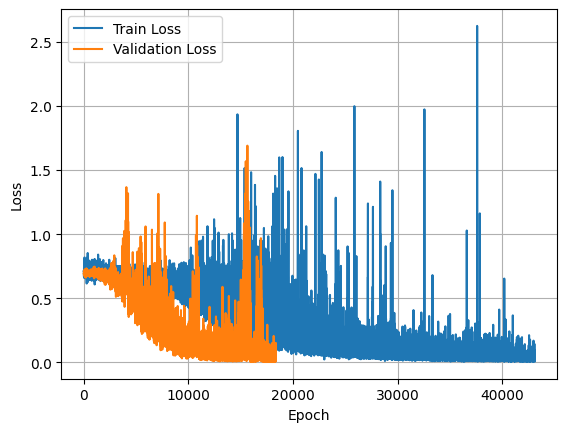

In [ ]:
n = 16
batch_size = 32
train_data = XORDataset(n, Train=True)
test_data = XORDataset(n, Train=False)
XOR_train_loader = DataLoader(train_data, batch_size, shuffle=True)
XOR_test_loader = DataLoader(test_data, batch_size, shuffle=False)
layers = [512]
activation_fn = nn.ReLU
XOR_net = XORNet(n, layers, activation_fn)
learning_rate=0.08
epochs=30
train_loss, test_loss = train_model(XOR_net, XOR_train_loader, XOR_test_loader, epochs, learning_rate, loss_fn = nn.BCELoss())
plot_loss(train_loss, test_loss)

Final Train Accuracy: 84.82%
Final Validation Accuracy: 84.73%


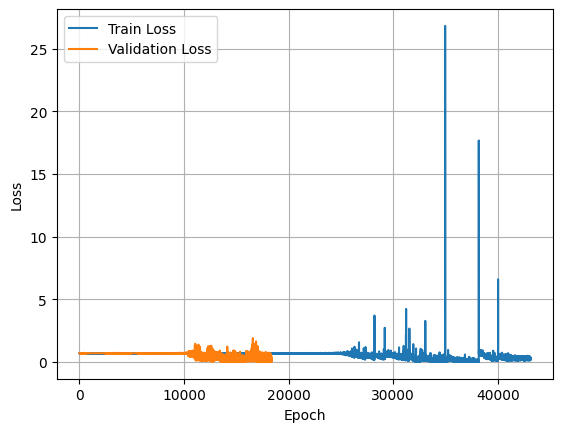

In [ ]:
n = 16
batch_size = 32
layers = [128,256,128]
activation_fn = nn.ReLU
learning_rate=0.08
epochs=30
loss_fn = nn.BCELoss()
build_training(n, batch_size, layers, activation_fn, learning_rate, epochs, loss_fn)

Final Train Accuracy: 99.87%
Final Validation Accuracy: 99.82%


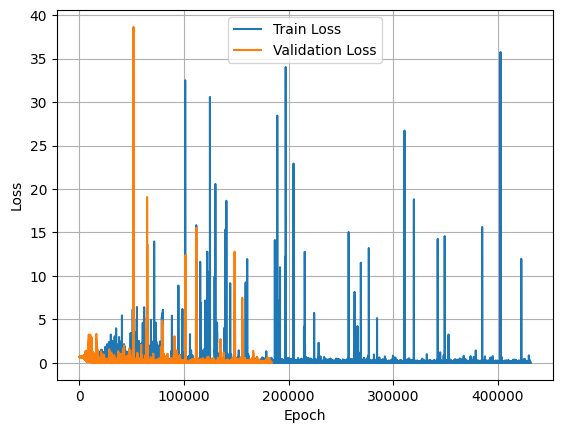

In [ ]:
n = 16
batch_size = 32
layers = [64]
activation_fn = nn.ReLU
learning_rate=0.1
epochs=300
loss_fn = nn.BCELoss()
build_training(n, batch_size, layers, activation_fn, learning_rate, epochs, loss_fn)

Final Train Accuracy: 97.96%
Final Validation Accuracy: 97.76%


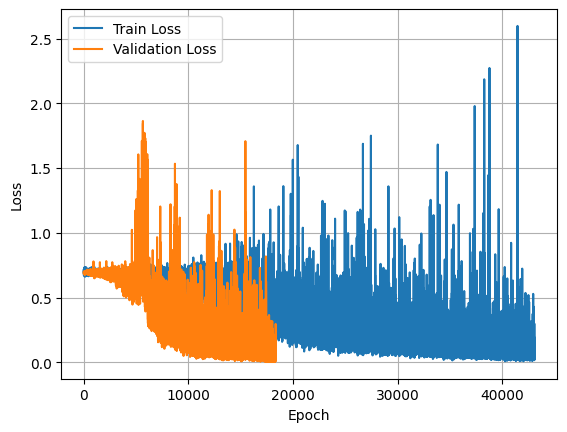

In [ ]:
n = 16
batch_size = 32
layers = [64]
activation_fn = nn.ReLU
learning_rate=0.1
epochs=30
loss_fn = nn.BCELoss()
build_training(n, batch_size, layers, activation_fn, learning_rate, epochs, loss_fn)

Final Train Accuracy: 56.68%
Final Validation Accuracy: 31.88%


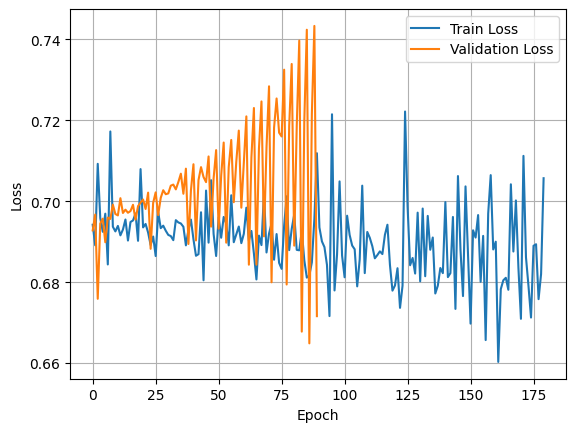

In [ ]:
n = 8
batch_size = 32
layers = [128,256,128]
activation_fn = nn.ReLU
learning_rate=0.2
epochs=30
loss_fn = nn.BCELoss()
build_training(n, batch_size, layers, activation_fn, learning_rate, epochs, loss_fn)

Final Train Accuracy: 57.22%
Final Validation Accuracy: 39.13%


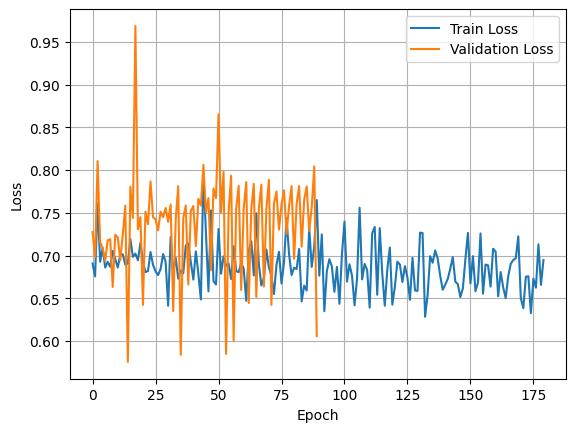

In [ ]:
n = 8
batch_size = 32
layers = [128]
activation_fn = nn.ReLU
learning_rate=0.2
epochs=30
loss_fn = nn.BCELoss()
build_training(n, batch_size, layers, activation_fn, learning_rate, epochs, loss_fn)

Final Train Accuracy: 57.22%
Final Validation Accuracy: 36.23%


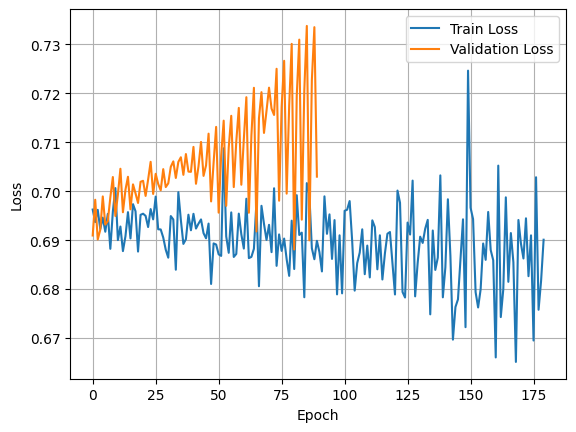

In [ ]:
n = 8
batch_size = 32
layers = [32,16]
activation_fn = nn.ReLU
learning_rate=0.2
epochs=30
loss_fn = nn.BCELoss()
build_training(n, batch_size, layers, activation_fn, learning_rate, epochs, loss_fn)

Final Train Accuracy: 34.76%
Final Validation Accuracy: 33.33%


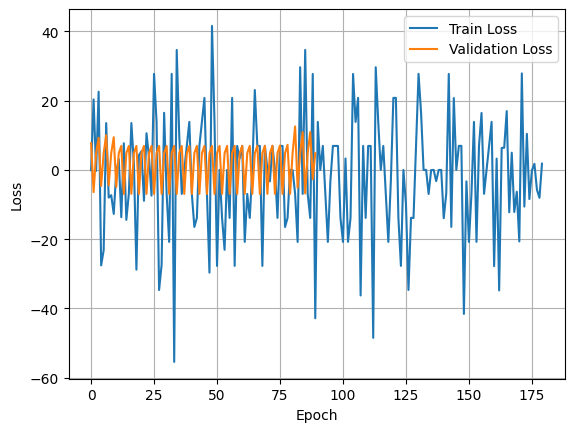

In [ ]:
n = 8
batch_size = 32
layers = [64,128]
activation_fn = nn.Tanh
learning_rate=0.2
epochs=30
loss_fn = nn.CrossEntropyLoss()
build_training(n, batch_size, layers, activation_fn, learning_rate, epochs, loss_fn, is_neg1_or_0=True)

In [ ]:
# Final network:
n = 16
batch_size = 32
train_data = XORDataset(n, Train=True)
test_data = XORDataset(n, Train=False)
XOR_train_loader = DataLoader(train_data, batch_size, shuffle=True)
XOR_test_loader = DataLoader(test_data, batch_size, shuffle=False)
layers = [512]
activation_fn = nn.ReLU
XOR_net = XORNet(n, layers, activation_fn)
learning_rate=0.08
epochs=30
train_loss, test_loss = train_model(XOR_net, XOR_train_loader, XOR_test_loader, epochs, learning_rate, loss_fn = nn.BCELoss())
plot_loss(train_loss, test_loss)

## Explainations

**Number of hidden layers and neurons:**

For n = 16:

Larger amount of neurons in a hidden network improves accuracy more than multpile layers with small number of neurons.

When number of neurons sums in layers, then the difference is less significant.

Since there is more data, overfitting is less probable - so for n >= 16 the accuracy is improved by having more neurons in the hidden layers.

Otherwise we get overfitting and hurt the accuracy.

For n = 8:

One layer and several make no difference- overfitting.

For n = 4:

Accuracy is low and mostly random - using the same model returns 20%, 60%, 80% seemingly randomly.

There is so little data that overfitting is too likely.

**For input representation -1/1 instead of 0/1:**

Accuracy is lower for relu, tanh improves but not as good as 0/1.

**Batch size:**

Changing batch size affects learning rate.

Smaller batch size is quicker but less accurate.